In [2]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

In [ ]:
# Take a look at the structure
train_data = ds["train"][0]
print(train_data)

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [ ]:
# Check the type and length of train_data
print(type(train_data))  # Should be <class 'datasets.arrow_dataset.Dataset'>
print(len(train_data))   # Should give you the number of records

<class 'dict'>
3


In [5]:
import nltk
from nltk.tokenize import sent_tokenize

# Ensure NLTK punkt tokenizer is downloaded
nltk.download('punkt')

# Access the training data
train_data = ds['train']

# Check the type and number of records
print(f"Type of train_data: {type(train_data)}")  # Should be <class 'datasets.dataset_dict.DatasetDict'>
print(f"Number of records in train_data: {len(train_data)}")  # Total number of articles

# Pre-processing function
def preprocess_article(article):
    # Split the article into sentences
    sentences = sent_tokenize(article)
    return sentences

# Pre-process articles
preprocessed_sentences = []

# Iterate over the Dataset to preprocess each article
for i in range(len(train_data)):
    article_data = train_data[i]  # Get each article data
    sentences = preprocess_article(article_data['article'])  # Access 'article' key
    preprocessed_sentences.append(sentences)

# Print the pre-processed sentences for the first article
print("Pre-processed sentences for the first article:")
for sentence in preprocessed_sentences[1]:
    print(sentence)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srujan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Type of train_data: <class 'datasets.arrow_dataset.Dataset'>
Number of records in train_data: 287113
Pre-processed sentences for the first article:
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."
Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court.
Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies."
He says the arrests often result from confrontations with police.
Mentally ill people often won't do what they're told when po

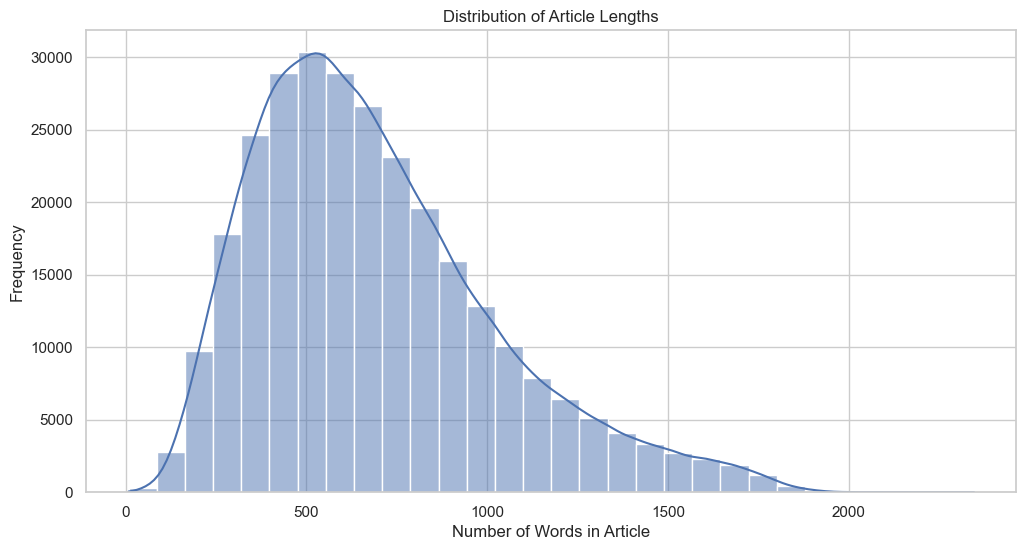

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

sns.set_theme(style="whitegrid")

# Step 1: Distribution of Article Lengths
article_lengths = [len(data['article'].split()) for data in train_data]
plt.figure(figsize=(12, 6))
sns.histplot(article_lengths, bins=30, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words in Article")
plt.ylabel("Frequency")
plt.show()

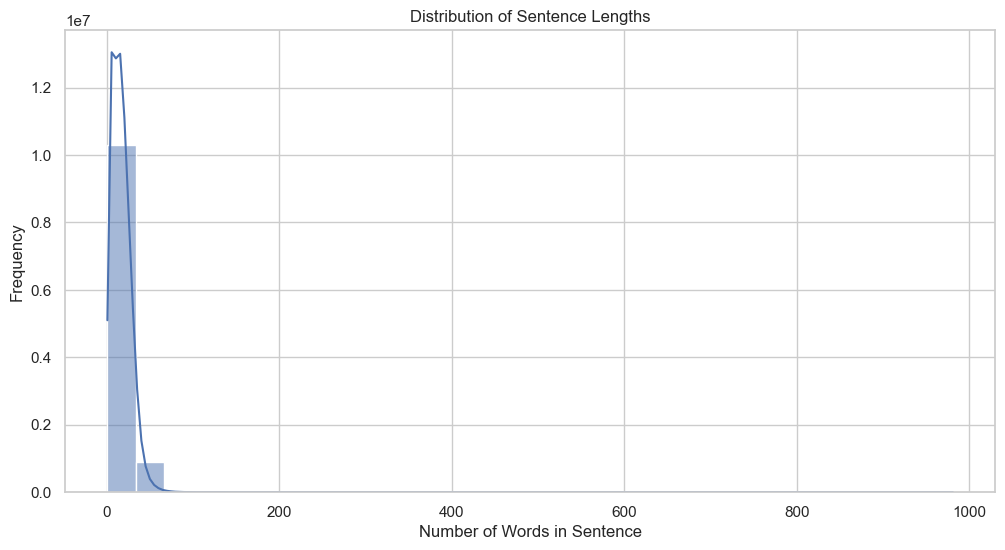

In [49]:
sentence_lengths = [len(sentence.split()) for sentences in preprocessed_sentences for sentence in sentences]
plt.figure(figsize=(12, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words in Sentence")
plt.ylabel("Frequency")
plt.show()

C:\Users\srujan\AppData\Local\Temp\ipykernel_24708\3116428681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


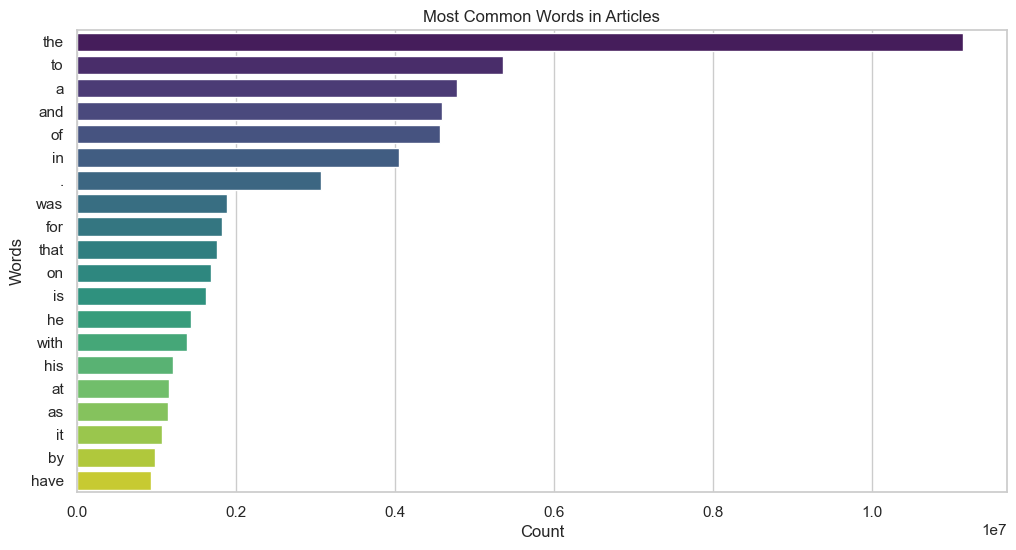

In [50]:
all_words = [word for article in train_data for word in article['article'].lower().split()]
common_words = Counter(all_words).most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Most Common Words in Articles")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

In [18]:
import nltk
import os
import warnings
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
warnings.filterwarnings("ignore")


# Download necessary NLTK resources
nltk.download('punkt')

# Original article
original_article = """Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."
Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court.
Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies."
He says the arrests often result from confrontations with police.
Mentally ill people often won't do what they're told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to follow directions, according to Leifman.
So, they end up on the ninth floor severely mentally disturbed, but not getting any real help because they're in jail.
We toured the jail with Leifman.
He is well known in Miami as an advocate for justice and the mentally ill.
Even though we were not exactly welcomed with open arms by the guards, we were given permission to shoot videotape and tour the floor.
Go inside the 'forgotten floor' » .
At first, it's hard to determine where the people are.
The prisoners are wearing sleeveless robes.
Imagine cutting holes for arms and feet in a heavy wool sleeping bag -- that's kind of what they look like.
They're designed to keep the mentally ill patients from injuring themselves.
That's also why they have no shoes, laces or mattresses.
Leifman says about one-third of all people in Miami-Dade county jails are mentally ill.
So, he says, the sheer volume is overwhelming the system, and the result is what we see on the ninth floor.
Of course, it is a jail, so it's not supposed to be warm and comforting, but the lights glare, the cells are tiny and it's loud.
We see two, sometimes three men -- sometimes in the robes, sometimes naked, lying or sitting in their cells.
"I am the son of the president.
You need to get me out of here!"
one man shouts at me.
He is absolutely serious, convinced that help is on the way -- if only he could reach the White House.
Leifman tells me that these prisoner-patients will often circulate through the system, occasionally stabilizing in a mental hospital, only to return to jail to face their charges.
It's brutally unjust, in his mind, and he has become a strong advocate for changing things in Miami.
Over a meal later, we talk about how things got this way for mental patients.
Leifman says 200 years ago people were considered "lunatics" and they were locked up in jails even if they had no charges against them.
They were just considered unfit to be in society.
Over the years, he says, there was some public outcry, and the mentally ill were moved out of jails and into hospitals.
But Leifman says many of these mental hospitals were so horrible they were shut down.
Where did the patients go?
Nowhere.
The streets.
They became, in many cases, the homeless, he says.
They never got treatment.
Leifman says in 1955 there were more than half a million people in state mental hospitals, and today that number has been reduced 90 percent, and 40,000 to 50,000 people are in mental hospitals.
The judge says he's working to change this.
Starting in 2008, many inmates who would otherwise have been brought to the "forgotten floor"  will instead be sent to a new mental health facility -- the first step on a journey toward long-term treatment, not just punishment.
Leifman says it's not the complete answer, but it's a start.
Leifman says the best part is that it's a win-win solution.
The patients win, the families are relieved, and the state saves money by simply not cycling these prisoners through again and again.
And, for Leifman, justice is served.
E-mail to a friend . """

# Step 1: Extractive Summarization
# Split the article into sentences
sentences = sent_tokenize(original_article)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer().fit_transform(sentences)
vectors = vectorizer.toarray()

# Calculate cosine similarity
cosine_matrix = cosine_similarity(vectors)

# Get most representative sentences
summary_indices = cosine_matrix.sum(axis=1).argsort()[-3:]  # Choose the top 3 sentences
extracted_sentences = [sentences[i] for i in sorted(summary_indices)]

# Combine extracted sentences into a single text
extracted_summary = " ".join(extracted_sentences)
print("Extractive Summary:")
print(extracted_summary)

# Step 2: Abstractive Summarization
# Initialize the Hugging Face summarization pipeline
abstractive_summarizer = pipeline("summarization", model="t5-small")

# Generate the abstractive summary based on the extracted summary
abstractive_summary = abstractive_summarizer(extracted_summary, max_length=60, min_length=40, do_sample=False)

# Output the refined summary
print("\nAbstractive Summary:")
print(abstractive_summary[0]['summary_text'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srujan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Extractive Summary:
So, he says, the sheer volume is overwhelming the system, and the result is what we see on the ninth floor. Of course, it is a jail, so it's not supposed to be warm and comforting, but the lights glare, the cells are tiny and it's loud. Over the years, he says, there was some public outcry, and the mentally ill were moved out of jails and into hospitals.

Abstractive Summary:
the system is a jail, so the lights glare, the cells are tiny and it's loud . over the years, he says, there was public outcry, and the mentally ill were moved out of jails and into hospitals .


In [16]:
from rouge_score import rouge_scorer

def calculate_rouge(generated_summary, reference_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

generated_summary = abstractive_summary[0]['summary_text']  # or any other summary
reference_summary = "Put the reference summary here"

rouge_scores = calculate_rouge(generated_summary, reference_summary)
print("ROUGE Scores:", rouge_scores)



ROUGE Scores: {'rouge1': Score(precision=0.02631578947368421, recall=0.2, fmeasure=0.046511627906976744), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.02631578947368421, recall=0.2, fmeasure=0.046511627906976744)}
